# Analyze Ice Caps

This notebook analyzes the 10 largest ice caps in regions 3, 4, 5, 6, 7, 8, 9, 10, and 17. Note: Only these regions were identified by the WGMS as ones needing to have ice cap analysis performed on them.

In [1]:
import os
import os.path as op
import sys
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy.plot as ep

# set working dir
HOME = op.join(op.expanduser("~"))
os.chdir(os.path.join(HOME, "git/wgms-glacier-project"))

# Set up path to load scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

In [2]:
# Open natural earth basemap TIF file
# ne_fp = 'data/natural-earth/NE1_50m_SR/NE1_50M_SR.tif' # 50 m res
ne_fp = 'data/natural-earth/NE1_HR_LC_SR_W/NE1_HR_LC_SR_W.tif' # 10 m res
with rio.open(ne_fp) as ne_src:
    # Convert / read the data into a numpy array:
    ne_raster = ne_src.read()
    ne_src_extent = plotting_extent(ne_src)
    bounds = ne_src.bounds

In [3]:
# Open glacier regions
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)

# Region 3
TBD - In work

In [4]:
#region = 3

# Open region 3 largest ice caps file
#region_lg_fn = "data/glims/processed/ice-caps/largest/largest-ice-caps-region_" + str(region) + ".shp"
#ten_lg_region_3_df = gpd.read_file(region_lg_fn)

# Region 7

In [5]:
# Set region number. Note that region 7 has two different largest files: one for svalbard and one for jan mayan
# This was done because the two regions are quite far apart from one another even though they are considered to be 
# in the same region
region = 7

# Open region 7 svalbard largest ice caps file
region_lg_svb_fn = "data/glims/processed/ice-caps/largest/largest-ice-caps-region_" + str(region) + ".shp"
ten_lg_region_7_svb_df = gpd.read_file(region_lg_svb_fn)

# Open region 7 svalbard largest ice caps file
region_lg_jm_fn = "data/glims/processed/ice-caps/largest/largest-ice-caps-region_" + str(region) + "_jan_mayan.shp"
ten_lg_region_7_jm_df = gpd.read_file(region_lg_jm_fn)

In [6]:
ten_lg_region_7_svb_df

,id,area,geometry
0,7,8402.703720,"POLYGON ((18.914782 78.469039, 18.910191 78.46..."
1,708,8077.403592,"POLYGON ((24.946811 79.36035200000001, 24.9392..."
2,8,5410.102716,"POLYGON ((13.66026 78.255189, 13.660433 78.255..."
3,431,4451.165085,"POLYGON ((18.185957 77.56537, 18.185853 77.565..."
4,706,2372.805757,"POLYGON ((19.215861 79.764661, 19.215788 79.76..."
5,215,1160.308733,"POLYGON ((23.382094 77.464433, 23.422874 77.45..."
6,638,646.149091,"POLYGON ((33.482192 80.22808499999999, 33.4878..."
7,871,511.149775,"POLYGON ((21.936172 78.491522, 21.963917 78.49..."
8,200,226.928046,"POLYGON ((22.046245 77.567789, 22.04168 77.568..."
9,762,161.182697,"POLYGON ((20.493904 79.52167, 20.497456 79.520..."


In [7]:
ten_lg_region_7_jm_df

,id,area,geometry
0,33,118.792189,POLYGON ((-8.148241688999974 71.03465712100007...
1,4,0.222576,POLYGON ((-8.371137058999977 71.05213838300006...
2,19,0.189459,POLYGON ((-8.299012187999949 71.01444808500008...
3,15,0.177596,POLYGON ((-8.050405730999955 71.02550502200006...
4,22,0.167730,POLYGON ((-8.299847267999951 71.02116699800007...
5,18,0.146138,POLYGON ((-8.246046701999944 71.01434958300007...
6,3,0.139312,POLYGON ((-8.029386747999979 71.04128799700004...
7,12,0.138805,POLYGON ((-8.045878538999943 71.01626489100005...
8,17,0.126166,POLYGON ((-8.133996554999953 71.01466256800006...
9,14,0.117333,POLYGON ((-8.145961154999952 71.02406290300007...


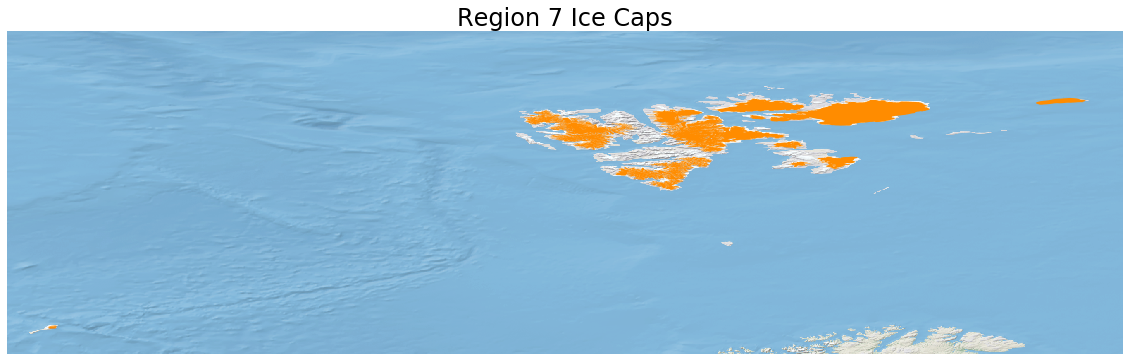

In [10]:
# Set up plot space
fig, ax = plt.subplots(figsize=(20, 20))
minx, miny, maxx, maxy = glacier_regions.loc[6:6].total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 7
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot largest and the title and legend
ten_lg_region_7_svb_df.plot(ax=ax, color="darkorange")
ten_lg_region_7_jm_df.plot(ax=ax, color="darkorange")
ax.set_title('Region 7 Ice Caps', fontsize=24)
ax.set_axis_off()

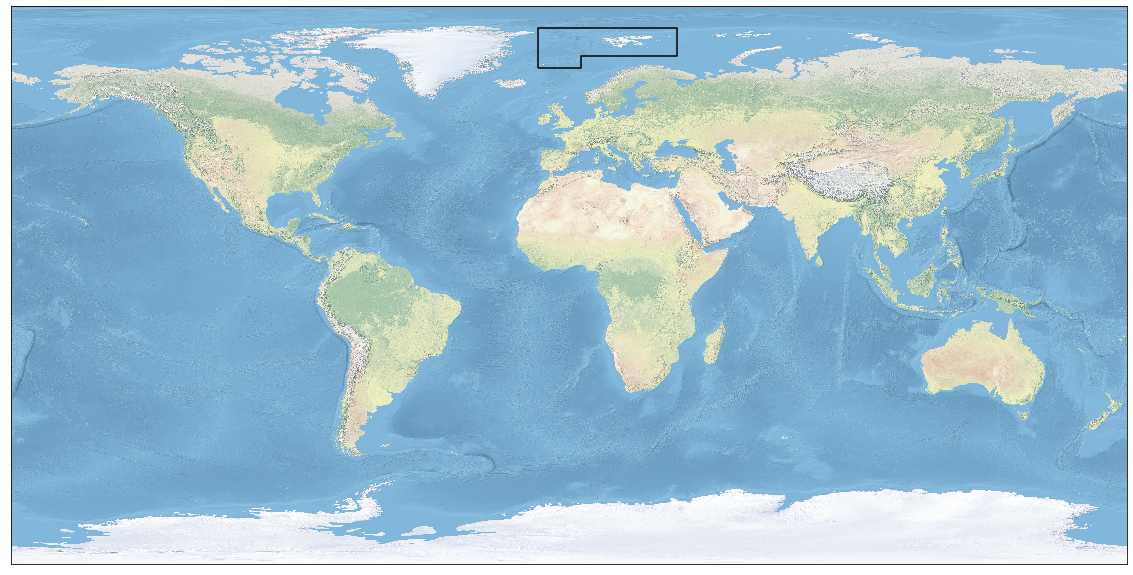

In [16]:
# Plot region 7 outline over the natural earth
# Plot natural earth basemap for Region 1
fig, ax = plt.subplots(figsize=(20, 20))

# Plot natural earth
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot region 7 noutline
glacier_regions[6:7].boundary.plot(ax=ax, color="black")

plt.show()

In [ ]:
# Create a clipping polygon for Jan Mayan
# Create dataframe that holds the clipping box
jan_mayan_points = Polygon([(-9.5691, 71.5205), (-7.2620, 71.5205),
                                 (-7.2620, 70.5136), (-9.5691, 70.5136), 
                                 (-9.5691, 71.5205)])
jan_mayan_gdf = gpd.GeoDataFrame([1],
                                 geometry=[jan_mayan_points],
                                 crs={'init': 'epsg:4362'})

In [ ]:
# Plot the jan mayan outline on top of Region 7 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
minx, miny, maxx, maxy = glacier_regions.loc[6:6].total_bounds
ax1.set_xlim(minx, maxx)
ax1.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax1)

#jan_mayan_gdf.boundary.plot(ax=ax1, color='red')
glacier_regions.loc[6:6].boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 7 with Jan Mayan outline", fontsize=36)

In [ ]:
region_7_df.crs

In [ ]:
# Find the GLIMS outlines that lie within the jan mayan outline
jan_mayan_pip_mask = ws.pip(region_7_df, jan_mayan_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
jan_mayan_region = region_7_df.loc[jan_mayan_pip_mask]

In [ ]:
# Plot jan mayan area
fig, ax1 = plt.subplots(figsize=(50, 50))
#jan_mayan_region.plot(ax=ax1) # This doesn't plot anything because jan mayan isn't in the glims data
region_7_df.plot(ax=ax1)

In [ ]:
# open RGI region 7 because GLIMS doesn't contain jan mayan outlines
rgi_region_fn = "data/rgi/raw/07_rgi60_Svalbard/07_rgi60_Svalbard.shp"
rgi_region_7_df = gpd.read_file(rgi_region_fn)

In [ ]:
# Find the RGI outlines that lie within the jan mayan outline
jan_mayan_pip_mask = ws.pip(rgi_region_7_df, jan_mayan_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
jan_mayan_region = rgi_region_7_df.loc[jan_mayan_pip_mask]

In [ ]:
# Plot jan mayan area
fig, ax1 = plt.subplots(figsize=(50, 50))
jan_mayan_region.boundary.plot(ax=ax1)

In [ ]:
# Plot jan mayan glacier outlines over natural earth
# Set up plot space
fig, ax = plt.subplots(figsize=(20, 20))
minx, miny, maxx, maxy = jan_mayan_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

jan_mayan_region.boundary.plot(ax=ax, color='red')

In [ ]:
# Open RGI region 7 exploded glaicers file
rgi_exploded_fn = "data/rgi/processed/ice-caps/exploded/exploded_7.shp"
rgi_exploded_df = gpd.read_file(rgi_exploded_fn)

In [ ]:
# plot exploded jan mayan outline over natural earth
# Set up plot space
fig, ax = plt.subplots(figsize=(20, 20))
minx, miny, maxx, maxy = jan_mayan_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

rgi_exploded_df.boundary.plot(ax=ax, color='red')

In [ ]:
# Find the exploded RGI outlines that lie within the jan mayan outline
jan_mayan_exploded_pip_mask = ws.pip(rgi_exploded_df, jan_mayan_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
jan_mayan_exploded_region = rgi_exploded_df.loc[jan_mayan_exploded_pip_mask]

In [ ]:
jan_mayan_exploded_region

In [ ]:
fig, ax = plt.subplots(figsize=(50,50))
jan_mayan_exploded_region.boundary.plot(ax=ax, color='red')

In [ ]:
# Determine the area of all the jan mayan exploded polygons
jan_mayan_areas = jan_mayan_exploded_region['geometry'].to_crs({'init': 'epsg:3058'}).area/10**6

In [ ]:
jan_mayan_areas.iloc[27]

In [ ]:
jan_mayan_exploded_region.loc[27:27]

In [ ]:
# Add the areas to the dataframe
jan_mayan_exploded_region = jan_mayan_exploded_region.assign(area=jan_mayan_areas)

In [ ]:
jan_mayan_exploded_region

In [ ]:
# Select the largest jan mayan ice caps
jan_mayan_largest_df = jan_mayan_exploded_region[['id', 'area', 'geometry']].nlargest(1, 'area')

In [ ]:
jan_mayan_largest_df

In [ ]:
fig, ax = plt.subplots(figsize=(50,50))
jan_mayan_largest_df.boundary.plot(ax=ax, color='red')

In [ ]:
# Open GLIMS region 7 exploded
glims_region_7_exp_fn = "data/glims/processed/ice-caps/exploded/exploded_7.shp"
glims_region_7_exp_df = gpd.read_file(glims_region_7_exp_fn)

In [ ]:
glims_region_7_exp_df

In [ ]:
# Determine the area of all the polygons
glims_region_7_exp_areas = glims_region_7_exp_df['geometry'].to_crs({'init': 'epsg:3049'}).area/10**6
    
# Add the areas to the dataframe
glims_region_7_exp_df = glims_region_7_exp_df.assign(area=glims_region_7_exp_areas)
    
# Determine the 20 largest ice caps
twenty_largest_df = glims_region_7_exp_df[['id', 'area', 'geometry']].nlargest(20, 'area')

In [ ]:
twenty_largest_df